In [1]:
%matplotlib inline                
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import *
import lightkurve as lk               
import stella                    

In [5]:
m5 = lk.search_lightcurve('TIC233068870',sector=40,exptime=120) 
aumic = lk.search_lightcurve('TIC441420236',sector=27,exptime=120)

In [17]:
m4 = lk.search_lightcurve('TIC441398770',sector=27, exptime=120)

In [18]:
m4

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 27,2020,SPOC,120,441398770,0.0


In [6]:
aumic

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 27,2020,SPOC,120,441420236,0.0


In [7]:
m5_lc = m5.download().PDCSAP_FLUX
aumic_lc = aumic.download().PDCSAP_FLUX

/Users/lupitatovar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  """Entry point for launching an IPython kernel.
/Users/lupitatovar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  


In [8]:
m5_lc=m5_lc.PDCSAP_FLUX.remove_nans()
aumic_lc=aumic_lc.PDCSAP_FLUX.remove_nans()

/Users/lupitatovar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  """Entry point for launching an IPython kernel.
/Users/lupitatovar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  


In [19]:
m4_lc = m4.download().PDCSAP_FLUX
m4_lc=m4_lc.PDCSAP_FLUX.remove_nans()

/Users/lupitatovar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  """Entry point for launching an IPython kernel.
/Users/lupitatovar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  


Plotting the light curve

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

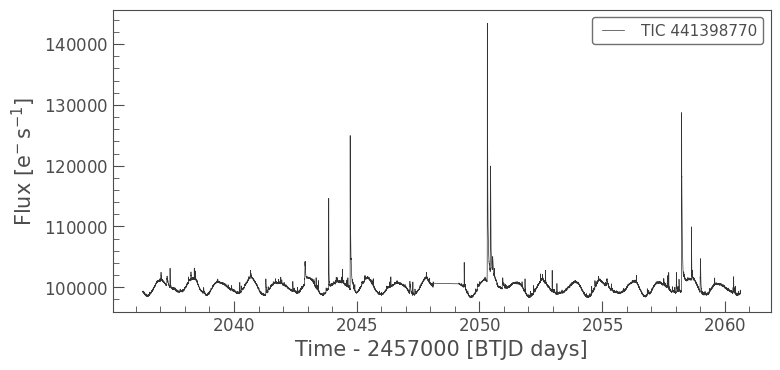

In [20]:
m4_lc.plot()

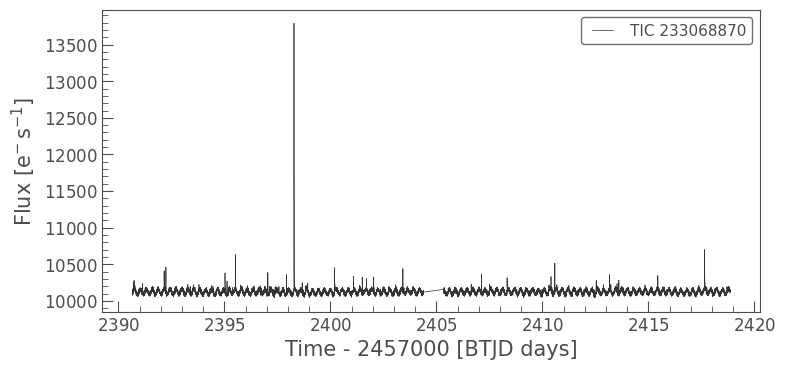

In [9]:
m5_lc.plot(); #this makes a plot of the light curve
#plt.xlim(1745,1750)
#plt.ylim(109000,115000)

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

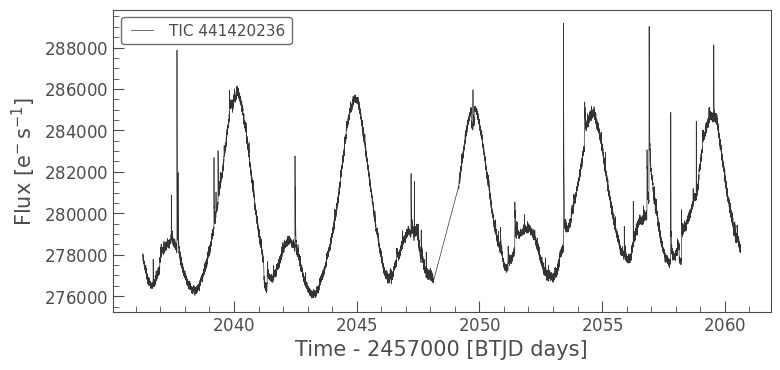

In [10]:
aumic_lc.plot()

We can use stella to calculate the rotation period of the star

In [11]:
m5_rot = stella.MeasureProt(['233068870'], [m5_lc.time.btjd], [m5_lc.flux], [m5_lc.flux_err])
aumic_rot = stella.MeasureProt(['441420236'], [aumic_lc.time.btjd], [aumic_lc.flux], [aumic_lc.flux_err])

In [21]:
m4_rot = stella.MeasureProt(['441398770'],[m4_lc.time.btjd],[m4_lc.flux], [m4_lc.flux_err])

Now that we have provided the target, flux, and time arrays stella can calculate the rotation period

In [22]:
m4_rot.run_LS()

Finding most likely periods: 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]


In [12]:
m5_rot.run_LS()

Finding most likely periods: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]


In [13]:
aumic_rot.run_LS()

Finding most likely periods: 100%|██████████| 1/1 [00:00<00:00, 14.32it/s]


In [23]:
m4_rot.LS_results

Target_ID,period_days,secondary_period_days,gauss_width,max_power,secondary_max_power,orbit_flag,oflag1,oflag2,Flags,avg_period_days
str9,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64
441398770,1.184986216278523,1.1717170826247982,0.043153316277296926,0.3966327509397885,0.09593279290449239,0.0,0.0,0.0,0,1.184986216278523


In [14]:
m5_rot.LS_results

Target_ID,period_days,secondary_period_days,gauss_width,max_power,secondary_max_power,orbit_flag,oflag1,oflag2,Flags,avg_period_days
str9,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64
233068870,0.28019097008048316,0.28025459199305813,0.002122929552195279,0.17870042670645817,0.036104476929667194,0.0,0.0,0.0,0,0.28019097008048316


In [15]:
aumic_rot.LS_results

Target_ID,period_days,secondary_period_days,gauss_width,max_power,secondary_max_power,orbit_flag,oflag1,oflag2,Flags,avg_period_days
str9,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64
441420236,4.864668001801075,4.888265338959741,0.9321249851813589,0.5948309421046697,0.19521866915460637,0.0,0.0,0.0,0,4.864668001801075


<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

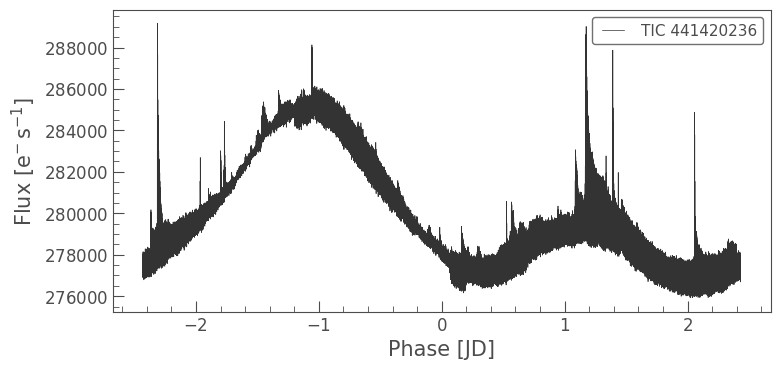

In [16]:
aumic_lc.fold(aumic_rot.LS_results['avg_period_days'].data[0]).plot()

## Part 2: Using Stella

We will be using the flare finding algortithm developed by Adina Feinstein to search for flares in the TESS data.
You can learn more about stella and how it work here: https://adina.feinste.in/stella/index.html

We will start by creating a new folder in our local documents and downloading the training sets

In [37]:
import os, sys
#sys.path.insert(1,/Users/lupitatovar/anaconda3/lib/python3.7/site-packages/stella/)
from tqdm import tqdm_notebook

In [9]:
ds = stella.DownloadSets()
ds.download_models()

Models have already been downloaded to ~/.stella/models


In [10]:
ds.models

array(['/Users/lupitatovar/.stella/models/hlsp_stella_tess_ensemblemodel_s004_tess_v0.1.0_cnn.h5',
       '/Users/lupitatovar/.stella/models/hlsp_stella_tess_ensemblemodel_s005_tess_v0.1.0_cnn.h5',
       '/Users/lupitatovar/.stella/models/hlsp_stella_tess_ensemblemodel_s018_tess_v0.1.0_cnn.h5',
       '/Users/lupitatovar/.stella/models/hlsp_stella_tess_ensemblemodel_s028_tess_v0.1.0_cnn.h5',
       '/Users/lupitatovar/.stella/models/hlsp_stella_tess_ensemblemodel_s029_tess_v0.1.0_cnn.h5',
       '/Users/lupitatovar/.stella/models/hlsp_stella_tess_ensemblemodel_s038_tess_v0.1.0_cnn.h5',
       '/Users/lupitatovar/.stella/models/hlsp_stella_tess_ensemblemodel_s050_tess_v0.1.0_cnn.h5',
       '/Users/lupitatovar/.stella/models/hlsp_stella_tess_ensemblemodel_s077_tess_v0.1.0_cnn.h5',
       '/Users/lupitatovar/.stella/models/hlsp_stella_tess_ensemblemodel_s078_tess_v0.1.0_cnn.h5',
       '/Users/lupitatovar/.stella/models/hlsp_stella_tess_ensemblemodel_s080_tess_v0.1.0_cnn.h5'],
      dty

Now we are going to create another folder where the results will be stored

In [28]:
OUT_DIR = '/Users/lupitatovar/local_flares/stella/results' #change this to you file path

Now we can call stella and tell it where we will be saving our results

In [29]:
cnn = stella.ConvNN(output_dir=OUT_DIR)

Can only use stella.ConvNN.predict().


Now we can use the model we saved to predict flares on the indicated light curve

In [30]:
cnn.predict(modelname=ds.models[0],
            times=lc.time.btjd,
            fluxes=lc.flux,
            errs=lc.flux_err)
single_pred = cnn.predictions[0]

100%|██████████| 1/1 [00:01<00:00,  1.77s/it]


You can inspect the model a bit more by calling cnn.model.summary() which details the layers, size, and output shapes for the 𝚜𝚝𝚎𝚕𝚕𝚊 models.

In [31]:
cnn.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 200, 16)           64        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 100, 16)           0         
_________________________________________________________________
dropout (Dropout)            (None, 100, 16)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 100, 64)           3136      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 50, 64)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0

Stella also makes some awesome plots that display and mark all of the flares that were identified in the light curve
The color bar tellls you how probable any given point(s) in time are to be flares (yellow = flare, purple = no flare)

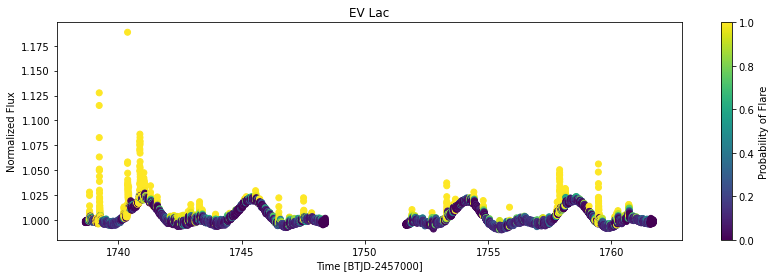

In [32]:
plt.figure(figsize=(14,4))
plt.scatter(cnn.predict_time[0], cnn.predict_flux[0],
            c=single_pred, vmin=0, vmax=1)
plt.colorbar(label='Probability of Flare')
plt.xlabel('Time [BTJD-2457000]')
plt.ylabel('Normalized Flux')
plt.title('EV Lac');

Ensembling 101



In [33]:
preds = np.zeros((len(ds.models),len(cnn.predictions[0])))

for i, model in enumerate(ds.models):
    cnn.predict(modelname=ds.models[0],
                times=lc.time.btjd,
                fluxes=lc.flux,
                errs=lc.flux_err)
    preds[i] = cnn.predictions[0]

avg_pred = np.nanmedian(preds, axis=0)

100%|██████████| 1/1 [00:01<00:00,  1.08s/it]


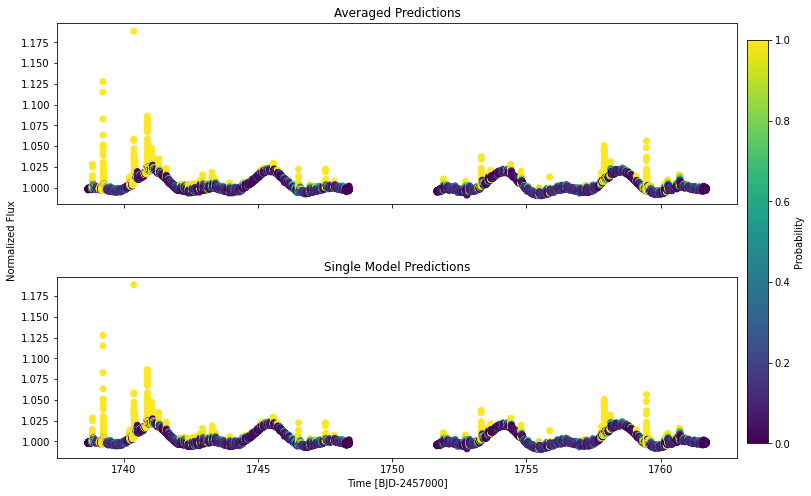

In [34]:
fig, (ax1, ax2) = plt.subplots(figsize=(14,8), nrows=2,
                               sharex=True, sharey=True)
im = ax1.scatter(cnn.predict_time[0], cnn.predict_flux[0],
            c=avg_pred, vmin=0, vmax=1)
ax2.scatter(cnn.predict_time[0], cnn.predict_flux[0],
            c=single_pred, vmin=0, vmax=1)
ax2.set_xlabel('Time [BJD-2457000]')
ax2.set_ylabel('Normalized Flux', y=1.2)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.81, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax, label='Probability')


ax1.set_title('Averaged Predictions')
ax2.set_title('Single Model Predictions')

plt.subplots_adjust(hspace=0.4);

Text(0.5, 1.0, 'Black = Single Model; Orange = Averaged Models')

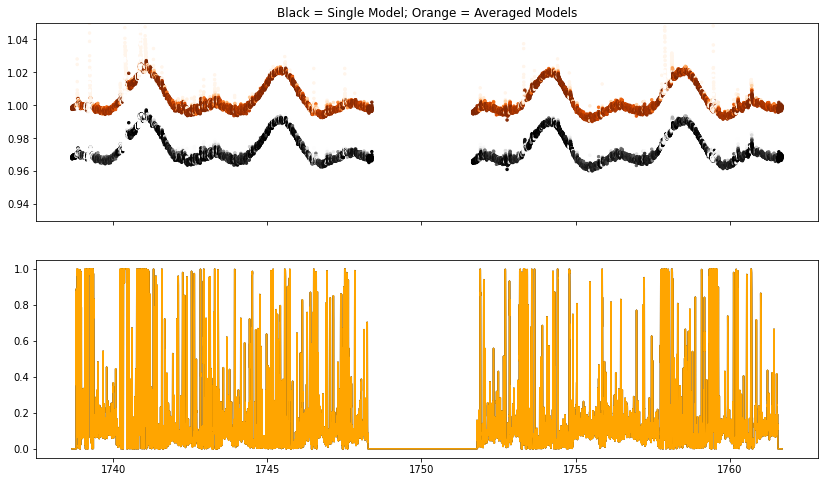

In [35]:
#zooming in to see differences
fig, (ax1, ax2) = plt.subplots(figsize=(14,8), nrows=2,
                               sharex=True)
ax1.scatter(cnn.predict_time[0], cnn.predict_flux[0],
            c=avg_pred, vmin=0, vmax=1, cmap='Oranges_r', s=6)
ax1.scatter(cnn.predict_time[0], cnn.predict_flux[0]-0.03,
            c=single_pred, vmin=0, vmax=1, cmap='Greys_r', s=6)
ax1.set_ylim(0.93,1.05)
ax2.plot(cnn.predict_time[0], single_pred, 'k')
ax2.plot(cnn.predict_time[0], avg_pred, 'orange')
ax1.set_title('Black = Single Model; Orange = Averaged Models')

Fitting Flares

In [38]:
MODEL_DIR = '/Users/lupitatovar/.stella/models'
MODEL = [os.path.join(MODEL_DIR,i) for i in
          os.listdir(MODEL_DIR) if i.endswith('.h5')][0]

In [39]:
# fitting the flares
ff = stella.FitFlares(id=[target],
                      time=[lc.time.btjd],
                      flux=[lc.flux.value],
                      flux_err=[lc.flux_err.value],
                      predictions=[cnn.predictions[0]])

In [43]:
ff.identify_flare_peaks(threshold=0.3) # can adjust threshold

ff.flare_table

Finding & Fitting Flares:   0%|          | 0/1 [00:00<?, ?it/s]/Users/lupitatovar/anaconda3/lib/python3.7/site-packages/stella/mark_flares.py:92: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(results)
Finding & Fitting Flares: 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]


Target_ID,tpeak,amp,ed_s,rise,fall,prob
float64,float64,float64,float64,float64,float64,float64
154101678.0,1744.141076099504,1.0033907232845516,3.451058834712016,0.003,0.008,0.4673279821872711
154101678.0,1744.5091355206287,1.00403611083675,4.134523133869511,0.0029884700080568005,0.007997680296263578,0.9864280223846436
154101678.0,1744.5091355206287,1.00403611083675,4.134523133869511,0.0029884700080568005,0.007997680296263578,0.9864280223846436
154101678.0,1745.067474499791,1.002121245188085,2.159797401584362,0.003,0.008,0.4479456841945648
154101678.0,1747.0383259026767,1.0041474427796104,4.209362105290723,0.0029897434442347952,0.007998815304144579,0.7230793237686157
154101678.0,1752.8647603053905,1.0058733752213194,5.978165551153886,0.003,0.008,0.7583102583885193
154101678.0,1752.8647603053905,1.0058733752213194,5.978165551153886,0.003,0.008,0.7583102583885193
154101678.0,1753.3494827876975,1.0059769217058085,6.102878158988281,0.0030146888369744357,0.008008944135351094,0.9999272227287292
154101678.0,1753.5800383233095,1.007211113177986,7.333968614244473,0.0029884598802744325,0.008006853780645275,0.9995944499969482


In [44]:
flare_table = ff.flare_table
flare_table=flare_table.to_pandas()
flare_table = flare_table.drop_duplicates()
print(len(flare_table))

11


(109000.0, 120000.0)

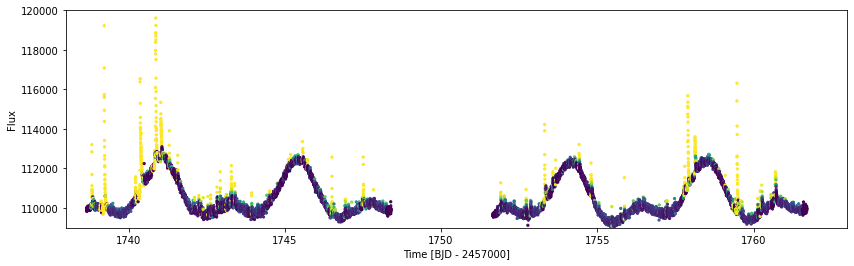

In [53]:
plt.figure(figsize=(14,4))
plt.scatter(ff.time[0], ff.flux[0], c=cnn.predictions[0], s=5)

for tpeak in ff.flare_table['tpeak']:
    plt.vlines(tpeak, 0,2, color='k', alpha=0.5, linewidth=5, zorder=0)


plt.xlabel('Time [BJD - 2457000]')
plt.ylabel('Flux');
plt.xlim(1738,1763)
plt.ylim(109000,120000)

## Part 3: Flare Frequency Distributions

For this part we will be using code written by Dr. Jim Davenport (available on GitHub: https://github.com/jradavenport/FFD) to create a flare frequency distribution plot

In [ ]:
from astropy.modeling.models import Gaussian2D


def FFD(ED, TOTEXP=1., Lum=30., fluxerr=0., dur=[], logY=True, est_comp=False):
    '''
    Given a set of stellar flares, with accompanying durations light curve properties,
    compute the reverse cumulative Flare Frequency Distribution (FFD), and
    approximate uncertainties in both energy and rate (X,Y) dimensions.
    This diagram can be read as measuring the number of flares per day at a
    given energy or larger.
    Not a complicated task, just tedious.
    Y-errors (rate) are computed using Poisson upper-limit approximation from
    Gehrels (1986) "Confidence limits for small numbers of events in astrophysical data", https://doi.org/10.1086/164079
    Eqn 7, assuming S=1.
    X-errors (event energy) are computed following Signal-to-Noise approach commonly
    used for Equivalent Widths in spectroscopy, from
    Vollmann & Eversberg (2006) "Astronomische Nachrichten, Vol.327, Issue 9, p.862", https://dx.doi.org/10.1002/asna.200610645
    Eqn 6.
    Parameters
    ----------
    ED : array of Equiv Dur's, need to include a luminosity!
    TOTEXP : total duration of observations, in days
    Lum : the log luminosity of the star
    fluxerr : the average flux errors of your data (in relative flux units!)
    dur : array of flare durations.
    logY : if True return Y-axis (and error) in log rate (Default: True)
    est_comp : estimate incompleteness using histogram method, scale Y errors?
        (Default: True)
    Returns
    -------
    ffd_x, ffd_y, ffd_xerr, ffd_yerr
    X coordinate always assumed to be log_10(Energy)
    Y coordinate is log_10(N/Day) by default, but optionally is N/Day
    Upgrade Ideas
    -------------
    - More graceful behavior if only an array of flares and a total duration are
        specified (i.e. just enough to make ffd_x, ffd_y)
    - Better propogation of specific flux errors in the light curve, rather than
        average error used
    - Include detrending errors? (e.g. from a GP)
    - Asymmetric Poisson errors?
    - Better handling of incompleteness?
    '''
    # REVERSE sort the flares in energy
    ss = np.argsort(np.array(ED))[::-1]
    ffd_x = np.log10(ED[ss]) + Lum

    Num = np.arange(1, len(ffd_x)+1)
    ffd_y = Num / TOTEXP

    # approximate the Poisson Y errors using Gehrels (1986) eqn 7
    Perror = np.sqrt(Num + 0.75) + 1.0
    ffd_yerr = Perror / TOTEXP

    # estimate completeness using the cumulative distribution of the histogram
    if est_comp:
        # make very loose guess at how many bins to choose
        nbin = int(np.sqrt(len(ffd_x)))
        if nbin < 10:
            nbin=10 # but use at least 10 bins

        # make histogram of the log(energies)
        hh, be = np.histogram(ffd_x, bins=nbin, range=[np.nanmin(ffd_x), np.nanmax(ffd_x)])
        hh = hh/np.nanmax(hh)
        # make cumulative distribution of the histogram, scale to =1 at the hist peak
        cc = np.cumsum(hh)/np.sum(hh[0:np.argmax(hh)])
        be = (be[1:]+be[0:-1])/2
        # make completeness = 1 for energies above the histogram peak
        cc[np.argmax(hh):] = 1
        # interpolate the cumulative histogram curve back to the original energies
        ycomp = np.interp(ffd_x, be, cc)
        # scale the y-errors by the completeness factor (i.e. inflate small energy errors)
        ffd_yerr = ffd_yerr / ycomp

    if logY:
        # transform FFD Y and Y Error into log10
        ffd_yerr = np.abs(ffd_yerr / np.log(10.) / ffd_y)
        ffd_y = np.log10(ffd_y)

    # compute X uncertainties for FFD
    if len(dur)==len(ffd_x):

        # assume relative flux error = 1/SN
        S2N = 1/fluxerr
        # based on Equivalent Width error
        # Eqn 6, Vollmann & Eversberg (2006) Astronomische Nachrichten, Vol.327, Issue 9, p.862
        ED_err = np.sqrt(2)*(dur[ss]*86400. - ED[ss])/S2N
        ffd_xerr = np.abs((ED_err) / np.log(10.) / ED[ss]) # convert to log
    else:
        # not particularly meaningful, but an interesting shape. NOT reccomended
        print('Warning: Durations not set. Making bad assumptions about the FFD X Error!')
        #ffd_xerr = (1/np.sqrt(ffd_x-np.nanmin(xT))/(np.nanmax(ffd_x)-np.nanmin(ffd_x)))
#what is xT?? should it be ffd_x??
        ffd_xerr = (1/np.sqrt(ffd_x-np.nanmin(ffd_x))/(np.nanmax(ffd_x)-np.nanmin(ffd_x)))
    return ffd_x, ffd_y, ffd_xerr, ffd_yerr


def FlareKernel(x, y, xe, ye, Nx=100, Ny=100, xlim=[], ylim=[], return_axis=True):
    '''
    Use 2D Gaussians (from astropy models) to make a basic kernel density,
    with errors in both X and Y considered. Turn into a 2D "image"
    Upgrade Ideas
    -------------
    It's slow. Since Gaussians are defined analytically, maybe this could be
    re-cast as a single array math opperation, and then refactored to have the
    same fit/evaluate behavior as KDE functions.  Hmm...
    '''

    if len(xlim) == 0:
        xlim = [np.nanmin(x) - np.nanmean(xe), np.nanmax(x) + np.nanmean(xe)]
    if len(ylim) == 0:
        ylim = [np.nanmin(y) - np.nanmean(ye), np.nanmax(y) + np.nanmean(ye)]

    xx,yy = np.meshgrid(np.linspace(xlim[0], xlim[1], Nx),
                        np.linspace(ylim[0], ylim[1], Ny), indexing='xy')
    dx = (np.max(xlim)-np.min(xlim)) / (Nx-1)
    dy = (np.max(ylim)-np.min(ylim)) / (Ny-1)

    im = np.zeros_like(xx)

    for k in range(len(x)):
        g = Gaussian2D(amplitude=1/(2*np.pi*(xe[k]+dx)*(ye[k]+dy)),
                       x_mean=x[k], y_mean=y[k], x_stddev=xe[k]+dx, y_stddev=ye[k]+dy)
        tmp = g(xx,yy)
        if np.isfinite(np.sum(tmp)):
            im = im + tmp

    if return_axis:
        return im, xx, yy
    else:
        return im